In [16]:
import drawSvg as draw
import random
import math
import numpy as np
import drawSvg as draw
from enhancedpaths import BasicPlot, CatmullRomChainPath

In [17]:
seedOverride = 1

seed = seedOverride if seedOverride is not None else random.randrange(0,10000)
random.seed(seed)


In [43]:

xMax = 5;
yMax = 100;
canvasWidth = 800;
canvasHeight = 800;


In [67]:

def fromCartesian(x,y):
    return (x * canvasWidth / xMax, y*canvasHeight / yMax)


class Line:
    def __init__(self, roots):
        self.roots = roots
        
    def fy(self,x):
        return math.prod([x-r for r in self.roots])

    def points(self):
        x0 = -1*xMax
        step = 0.01
        return [(x,self.fy(x)) for x in np.arange(x0,xMax, step)]

    def canvasPoints(self):
        canvasPoints = [fromCartesian(*point) for point in self.points()]
        canvasPoints = [(x,y) for (x,y) in canvasPoints if -1 * canvasWidth / 2 < x < canvasWidth / 2 and -1 * canvasHeight / 2 < y < canvasHeight /2]       
        return canvasPoints
        
    def toSvg(self):
        canvasPoints = self.canvasPoints()
        p = draw.Path(stroke_width=1, stroke='black',fill='none')
        p.M(*canvasPoints[0])
        for point in canvasPoints:
            p.L(*point)
        return p
    
        
        
        

In [68]:
num_lines = 25
root_mean = 0
root_std = 0.2
delta_mean = 0
delta_std = .25
min_degree = 2
max_degree = 7

In [69]:
degree = random.randint(min_degree,max_degree)
roots = [random.normalvariate(root_mean,root_std) for _ in range(degree)]

lines = [Line(roots)]
for i in range(num_lines):
    roots = [a + random.normalvariate(delta_mean,delta_std) for a in roots]
    lines.append(Line(roots))
    


In [70]:
d = draw.Drawing(canvasWidth, canvasHeight, origin='center')
for l in lines:
    d.append(l.toSvg())

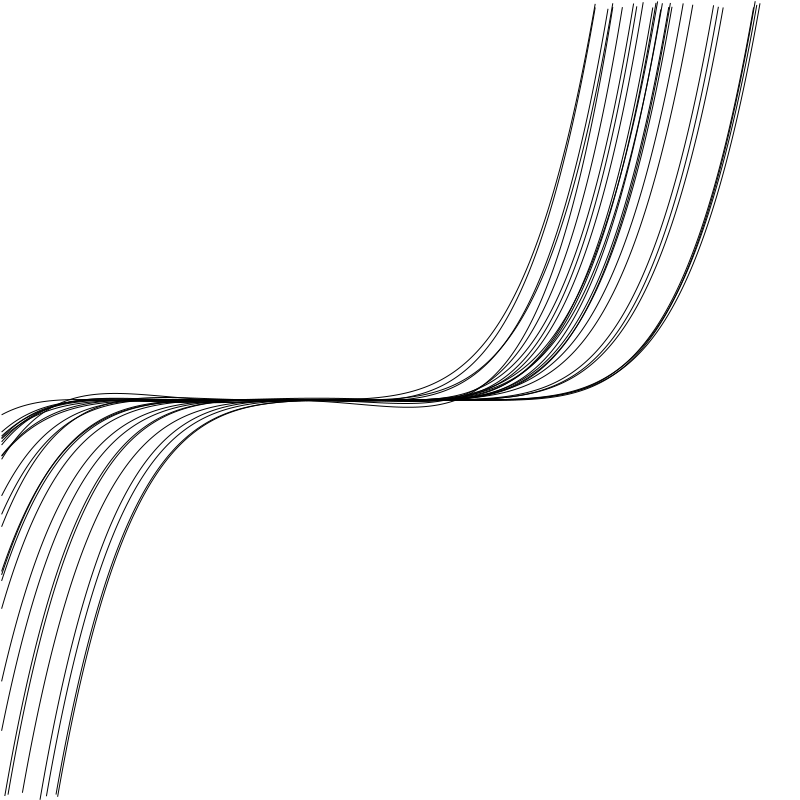

In [71]:
# Display in Jupyter notebook
d.rasterize()  # Display as PNG
d  # Display as SVG

In [14]:
# source : https://stackoverflow.com/a/21901260
import subprocess

def git_hash() -> str:
    return subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD']).decode('ascii').strip()

In [15]:
name='-'.join(["simple-polynomail", "version", git_hash(), "seed", str(seed)])
d.saveSvg("svgs/" + name + ".svg")